In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
try:
    salary = pd.read_csv("../datasets/salary_table.csv")
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/salary_table.csv'
    salary = pd.read_csv(url)
df = salary

In [4]:
df.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


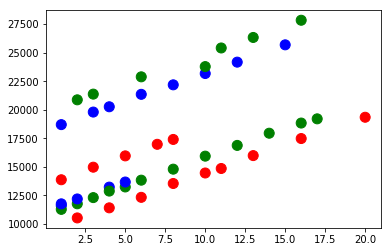

In [7]:
colors = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]),s=100)

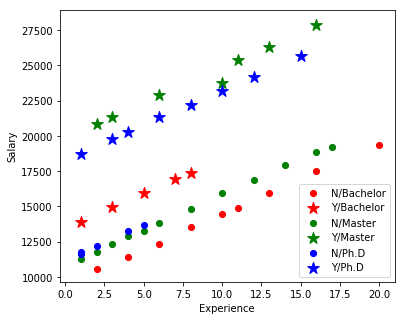

In [8]:
## Figure size
plt.figure(figsize=(6,5))

## Define colors / sumbols manually
symbols_manag = dict(Y='*', N='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}

## group by education x management => 6 groups
for values, d in salary.groupby(['education','management']):
    edu, manager = values
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], color=colors_edu[edu],s=150, label=manager+"/"+edu)
    
## Set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4) # lower right
plt.show()

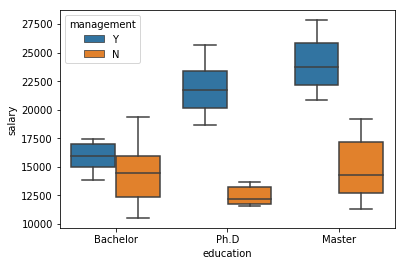

In [9]:
import seaborn as sns
sns.boxplot(x="education", y="salary", hue="management", data=df)

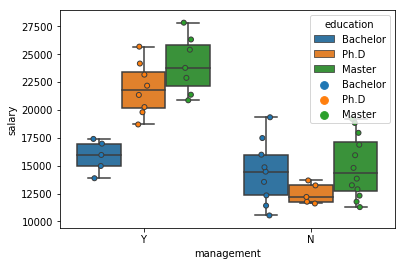

In [10]:
sns.boxplot(x="management", y="salary", hue="education", data=df)
sns.stripplot(x="management", y="salary", hue="education", data=df, jitter=True,dodge=True, linewidth=1)
# Jitter and split options separate datapoints according to group"

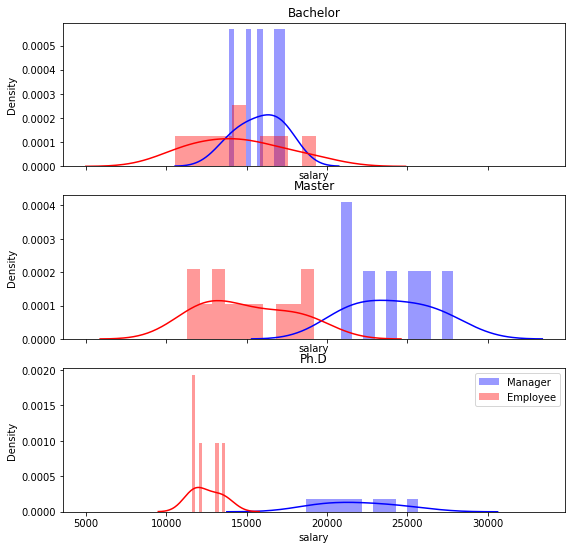

In [11]:
# Set up the matplotlib figure: 3 x 1 axis
f, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=True)
i = 0
for edu, d in df.groupby(['education']):
    sns.distplot(d.salary[d.management == "Y"], color="b", bins=10, label="Manager",ax=axes[i])
    sns.distplot(d.salary[d.management == "N"], color="r", bins=10, label="Employee",ax=axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel('Density')
    i += 1
ax = plt.legend()

A violin plot will include all the data that is in a box plot: a marker 
for the median of the data; a box or marker indicating 
the interquartile range; and possibly all sample points, if the number of samples is not too high.

A violin plot is more informative than a plain box plot. 
While a box plot only shows summary statistics such as mean/median and interquartile ranges, 
the violin plot shows the full distribution of the data. 
The difference is particularly useful when the data distribution is multimodal (more than one peak).

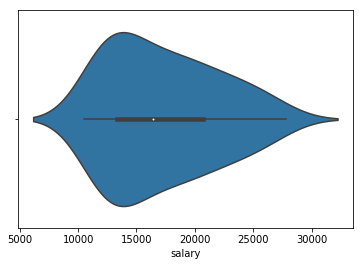

In [12]:
ax = sns.violinplot(x="salary", data=df)

Reducing the kernel bandwidth generates lumpier plots, which can aid in identifying minor clusters

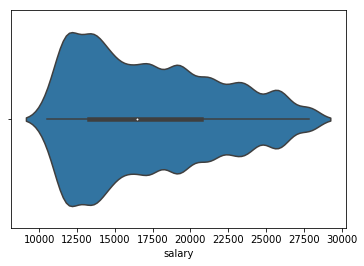

In [14]:
ax = sns.violinplot(x="salary", data=df, bw=.15)

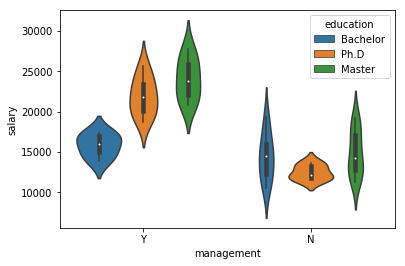

In [15]:
ax = sns.violinplot(x="management", y="salary", hue="education", data=df)

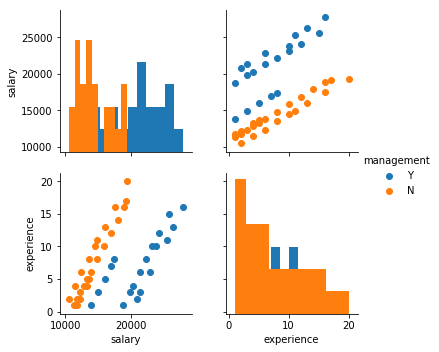

In [20]:
import seaborn as sns
g = sns.PairGrid(df, hue="management")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
ax = g.add_legend()

# Tips Data Set

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


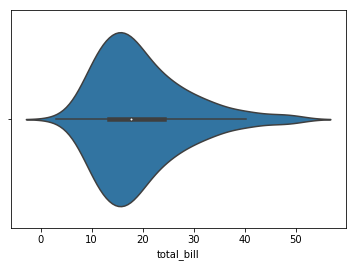

In [16]:

#sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
print(tips.head())
ax = sns.violinplot(x=tips["total_bill"])

grouped by day

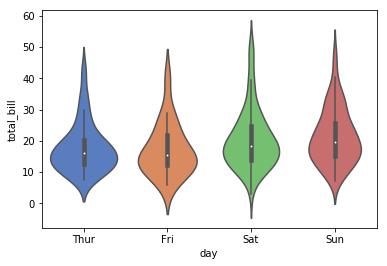

In [17]:
ax = sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

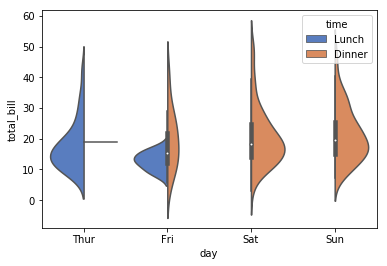

In [19]:
ax = sns.violinplot(x="day", y="total_bill", hue="time", data=tips, palette="muted",split=True)

# Time Series

pointplot are particularly adept at showing interactions: how the relationship between levels of one categorical variable 
changes across levels of a second categorical variable. 

In [22]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

In [23]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [25]:
fmri.shape

(1064, 5)

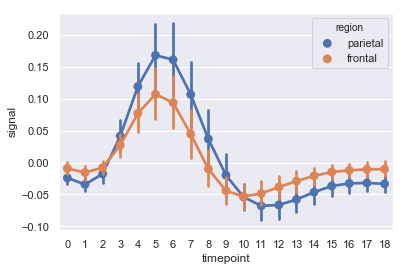

In [21]:


# Plot the responses for different events and regions
ax = sns.pointplot(x="timepoint", y="signal",hue="region", style="event",data=fmri)
